In [1]:
###########################################################################################
#
#                                     Sección de Interfaz 
#                                               
#
###########################################################################################


import tkinter

from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure

import numpy as np


root = tkinter.Tk()
#root.wm_iconbitmap('C:/Users/logo.ico') # Aqui va el logo de la parte superior izquierda de la ventana
root.wm_title('Interfaz de graficacion')
root.resizable(width=False, height=False) # Con width=True, height=True se puede modificar el tamaño de la ventana
root.geometry("770x530") # Tamaño de la ventana

###################################################################################

fig = Figure(figsize=(5, 4), dpi=100)

t = np.arange(0, 3, .01)
fig.add_subplot(111).plot(t, 2 * np.cos(2 * np.pi * t))

canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

def on_key_press(event):
    print("you pressed {}".format(event.key))
    key_press_handler(event, canvas, toolbar)

def graficar():
    plt.plot(x,y)
    
def cierre():
    root.quit()     # stops mainloop
    root.destroy()  # this is necessary on Windows to prevent
                    # Fatal Python Error: PyEval_RestoreThread: NULL tstate

        #============================================Buttons Widget===============================================#
        
button = tkinter.Button(master=root, text="Graficar", width=8, height =1, font=('calibri',9,'bold'), bd=7, bg='gainsboro', command= cierre) 
button.pack(side=tkinter.TOP)

        
button = tkinter.Button(master=root, text="Salir", width=8, height =1, font=('calibri',9,'bold'), bd=7, bg='gainsboro', command= cierre) 
button.pack(side=tkinter.BOTTOM)
#button.place(x=25, y=100)

#button.place(x=25, y=100)

tkinter.mainloop()
# If you put root.destroy() here, it will cause an error if the window is
# closed with the window manager.

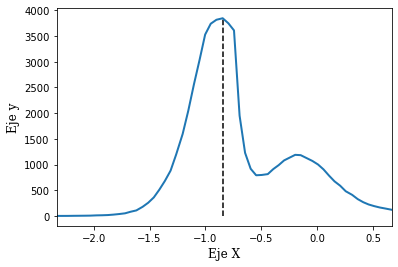

In [13]:
#####################################################################################################################################
##                                                                                                                                 ##
##                                                                                                                                 ## 
##                                                    Package loading                                                              ##
##                                                                                                                                 ##
##                                                                                                                                 ##
##                                                                                                                                 ##   
#####################################################################################################################################
from scipy import signal
import numpy as np
import pandas as pd
import math as m
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm

#####################################################################################################################################
##                                                                                                                                 ## 
##                                                    CALIBRATION SCAN                                                             ##
##                                                                                                                                 ##
#####################################################################################################################################

#=================================================================Modulo de Carga de Datos ===================================================#
DataMS = pd.read_csv("C:/Users/renea/Desktop/test_calibration.txt", sep='\t')
DataMS_arr = DataMS.to_numpy()

#================================================================ Pase de los datos ==========================================================#
MS_arr = DataMS_arr[0:,1:3]
x = MS_arr[0:,0]*(-1)
y = MS_arr[0:,1]

#================================================================ Detector de Picos ==========================================================#
peak_widths = np.arange(0.5, 1.001)
peak_indices = signal.find_peaks_cwt(y, peak_widths)
peak_count = len(peak_indices)

#=============================================================== Graficador ==================================================================#
plt.plot(x,y, linewidth = 2)

#=========================================================== Identificacion de los picos =====================================================#
#plt.vlines(x[peak_indices], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5)
plt.vlines(x[peak_indices[6]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5)
calibre03feb = (x[peak_indices[6]])* (-1)

#====================================================Limites del grafico e identificación de ejes ============================================#
plt.xlim(min(x),max(x))
plt.xlabel("Eje X", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Eje y", color = "black", family = "Serif", fontsize = 12)

#================================================= Grabado de la grafica en la carpeta seleccinada ============================================#
plt.savefig("C:/Users/renea/Desktop/test_calibration.png", dpi=350, bbox_inches='tight', pad_inches=0.3)